# PCA

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import classification_report

# Set themes and figure size globally
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (7, 5)  # Global figure size
plt.rcParams['figure.dpi'] = 200  # DPI for clarity
import warnings
warnings.filterwarnings('ignore')
# Inline plotting for Jupyter notebooks
%matplotlib inline 

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_9/wine.csv")

In [86]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Task 1: Exploratory Data Analysis (EDA):

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [89]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [90]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [91]:
df.shape

(178, 14)

Text(0, 0.5, 'Alcalinity')

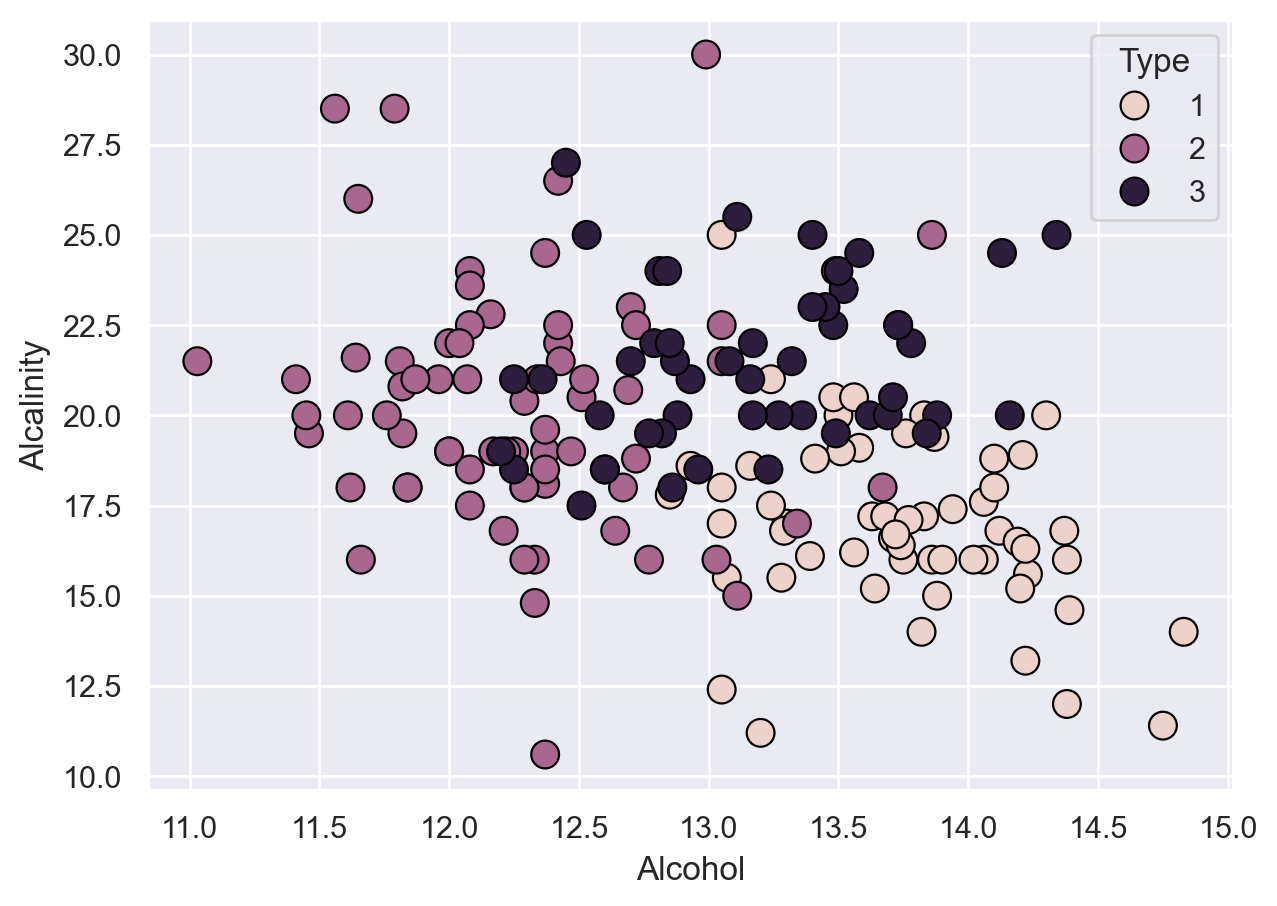

In [92]:
sns.scatterplot(x =df['Alcohol'], y=df['Alcalinity'], hue=df['Type'],s=100, edgecolor='black')
plt.xlabel("Alcohol")
plt.ylabel("Alcalinity")

Text(0, 0.5, 'Phenols')

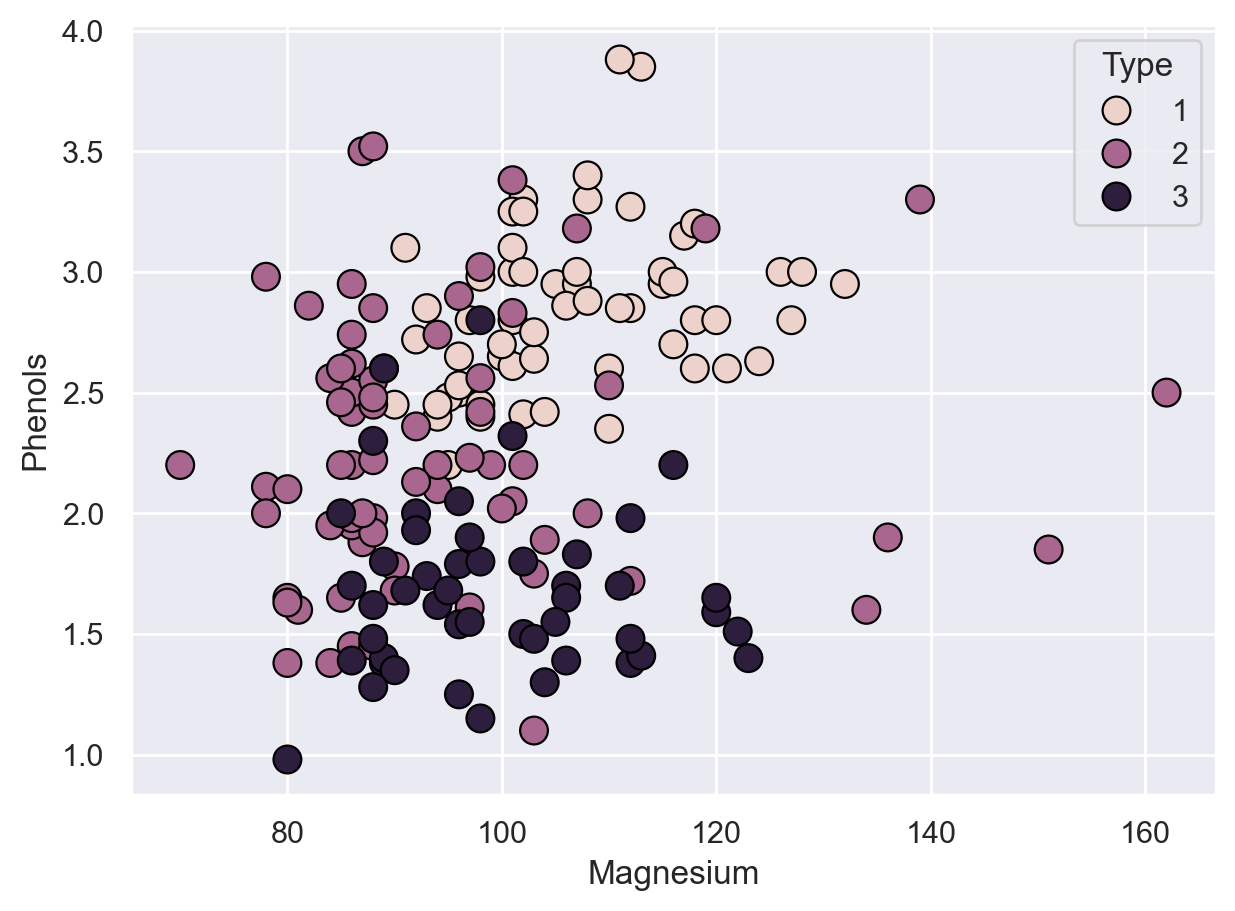

In [93]:
sns.scatterplot(x =df['Magnesium'], y=df['Phenols'], hue=df['Type'],s=100, edgecolor='black')
plt.xlabel("Magnesium")
plt.ylabel("Phenols")

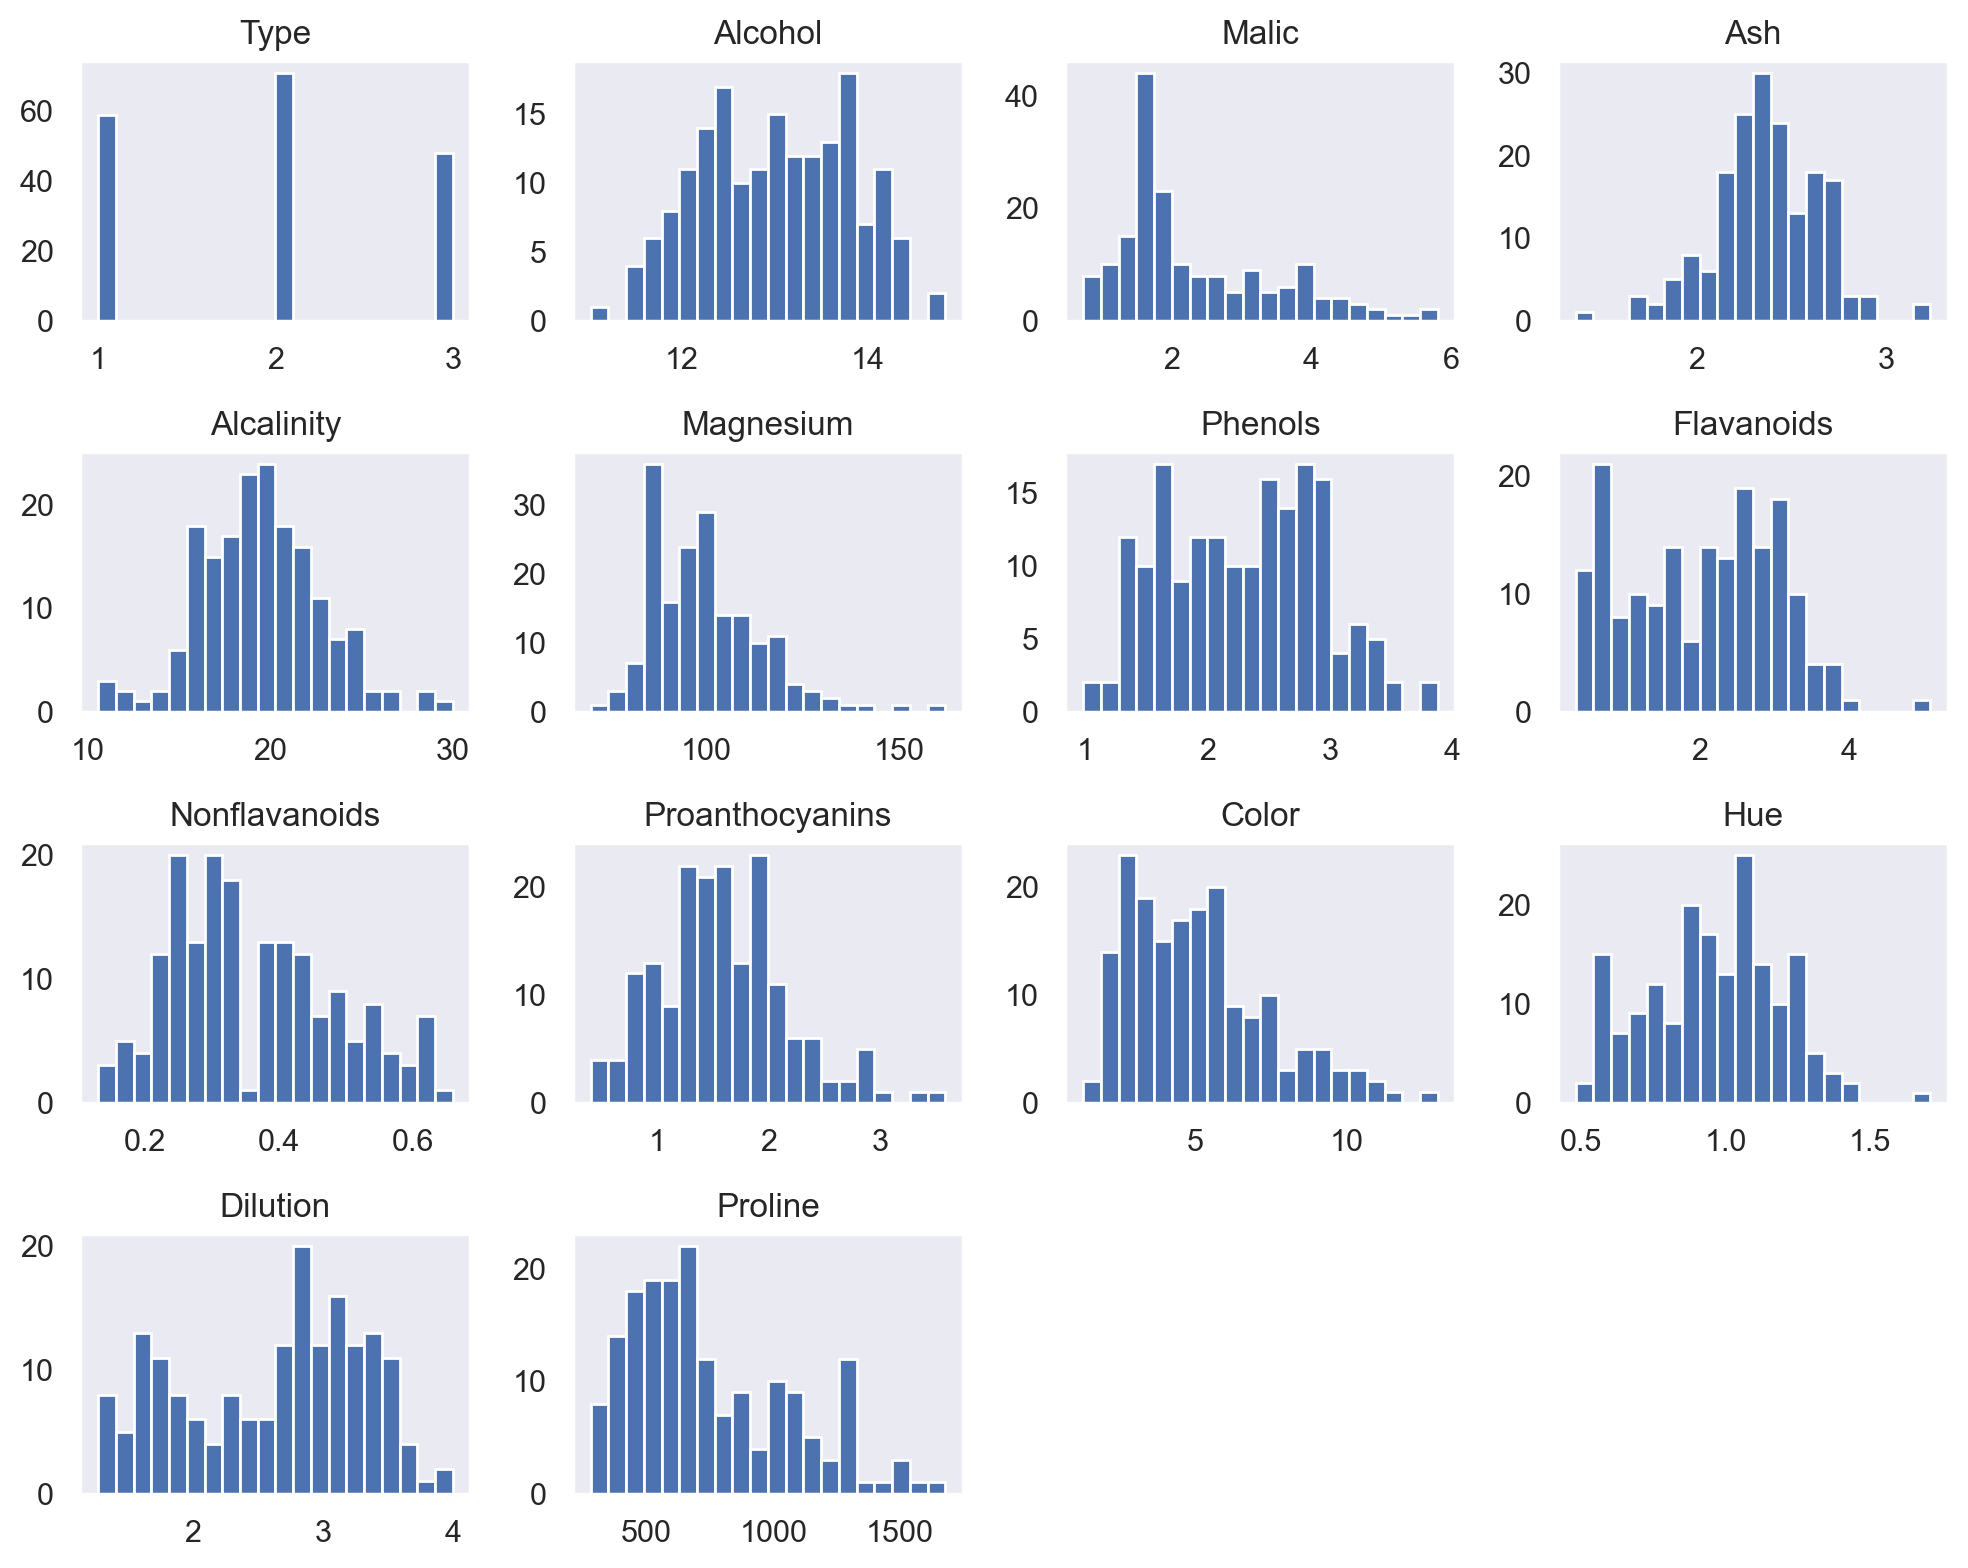

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for all numeric columns in the DataFrame
df.hist(bins=20, figsize=(10, 8), grid=False)

# Display the plot
plt.tight_layout()
plt.show()


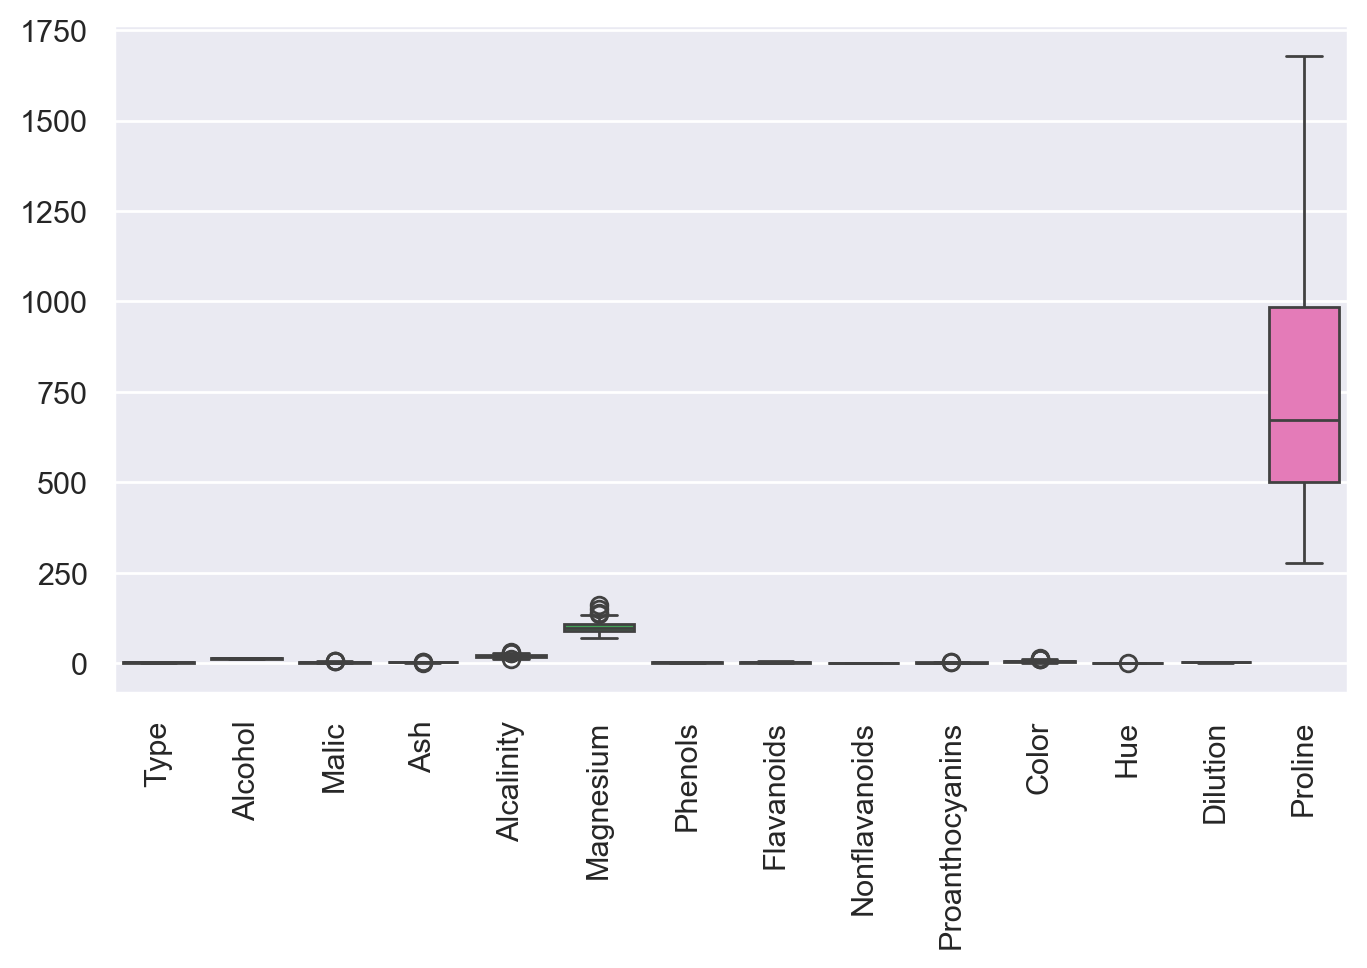

In [95]:
# Box plot for all columns in the DataFrame
sns.boxplot(data=df)  # 'data' parameter expects a DataFrame

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


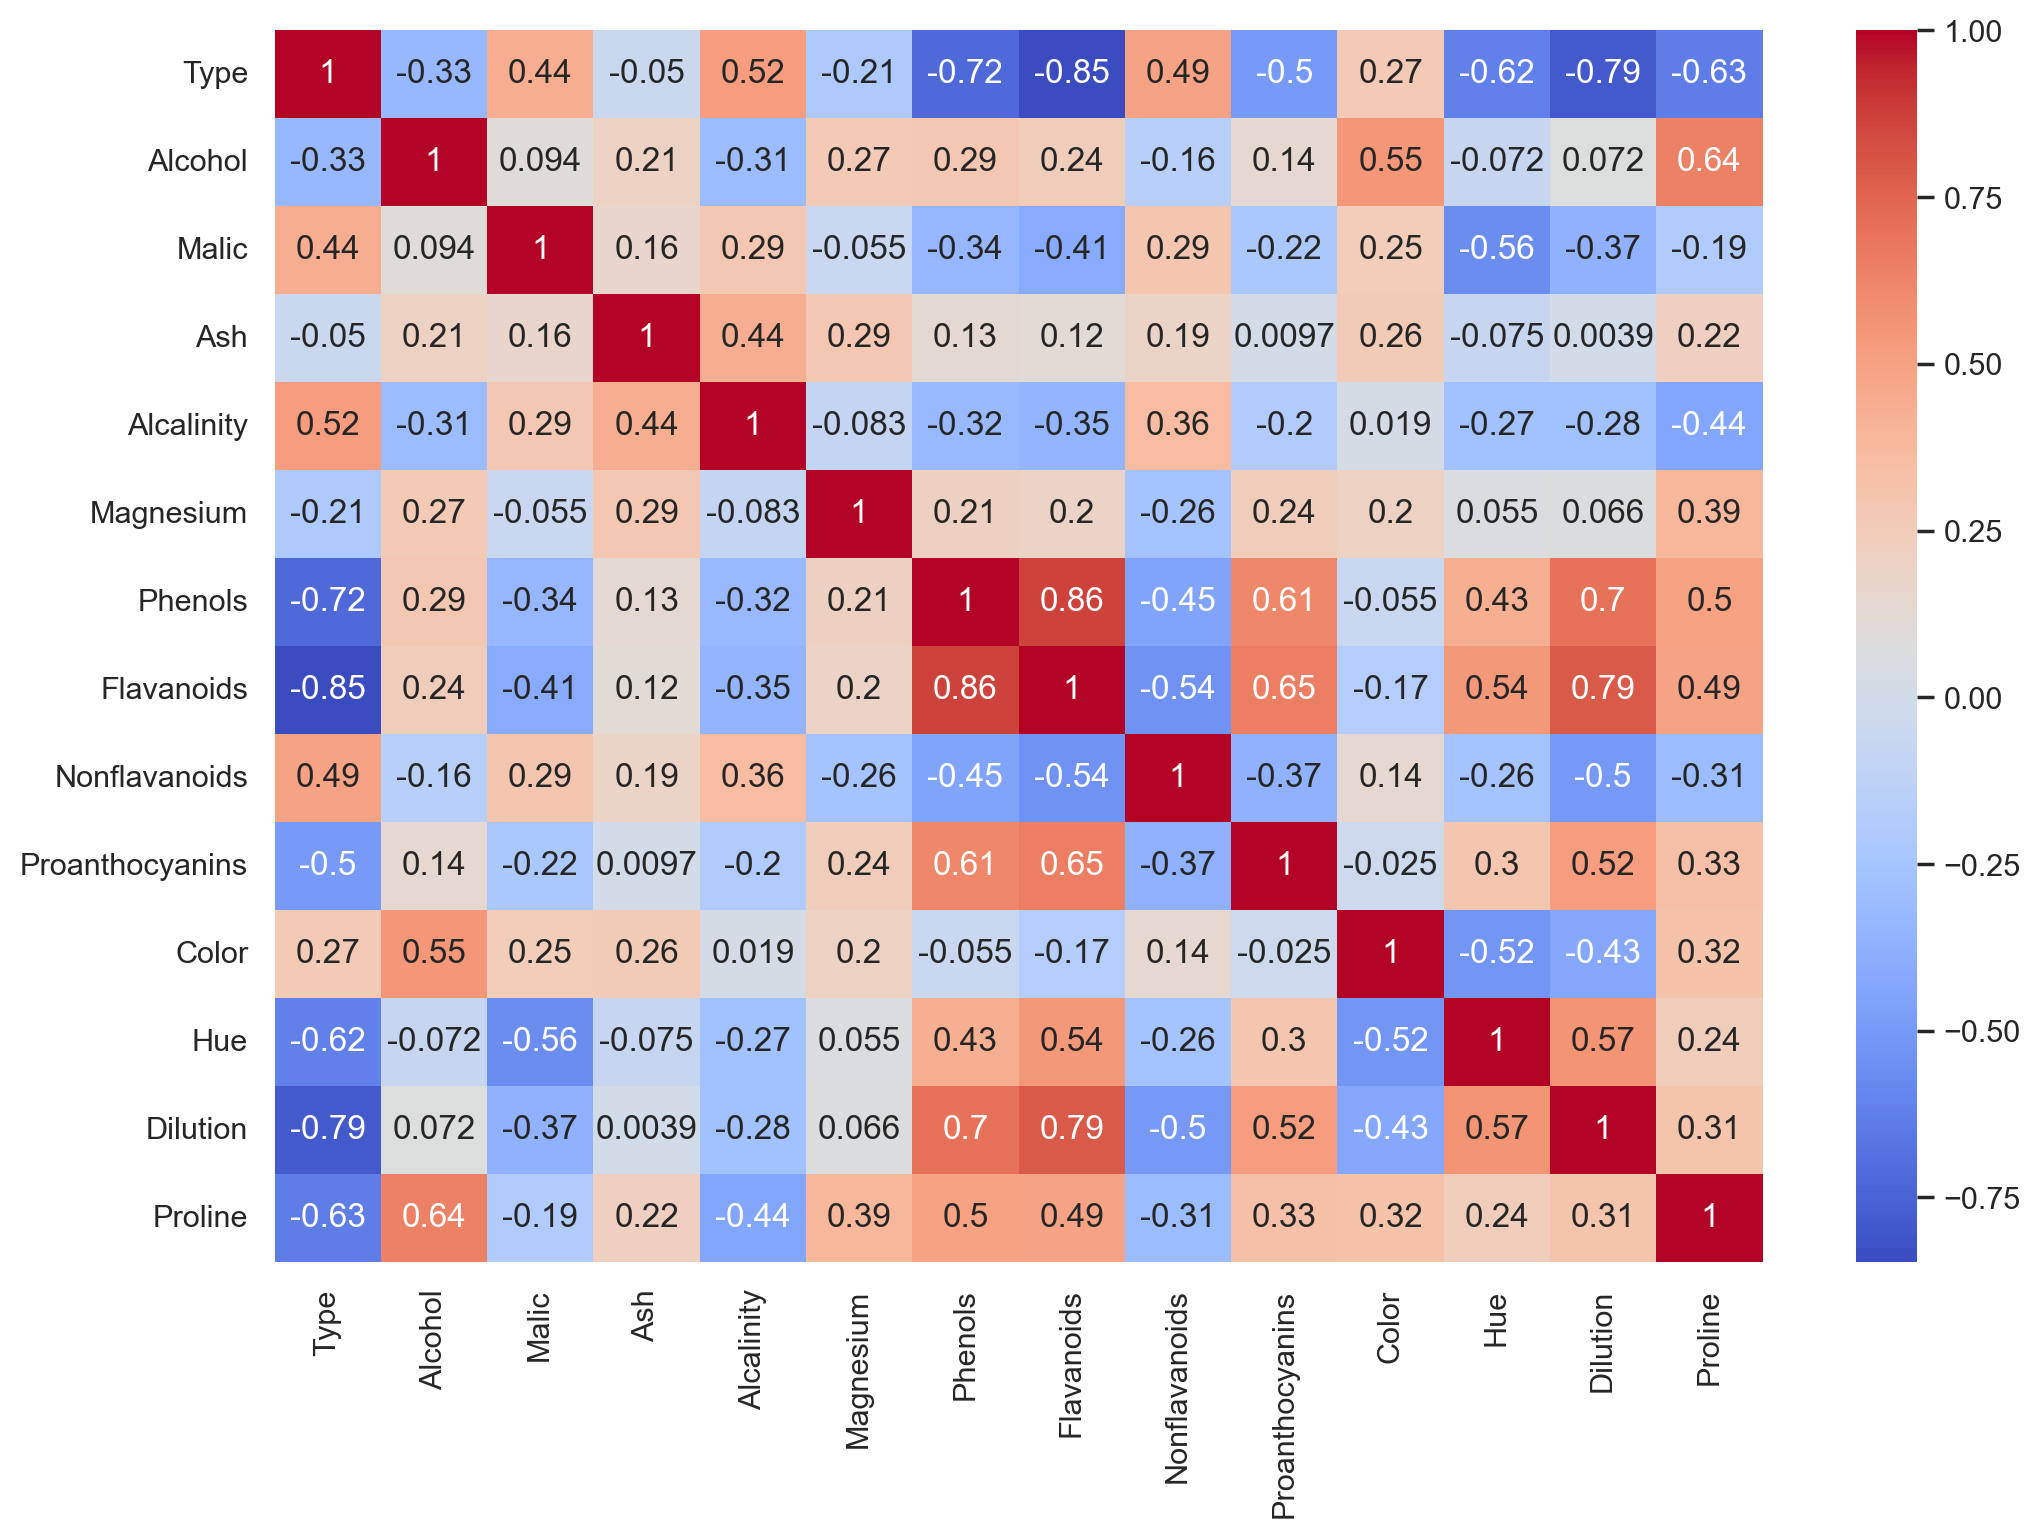

In [96]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [97]:
x=df.iloc[:,1:]       #x=df.iloc[:,:4]
y=df['Type']

In [98]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [99]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


# Task 2: Dimensionality Reduction with PCA:

In [101]:
pca = PCA()
pcs=pca.fit_transform(x)

In [102]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [103]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [104]:
np.cumsum(pca.explained_variance_ratio_)          #Cumlutaive Sum 

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Screen Plot')

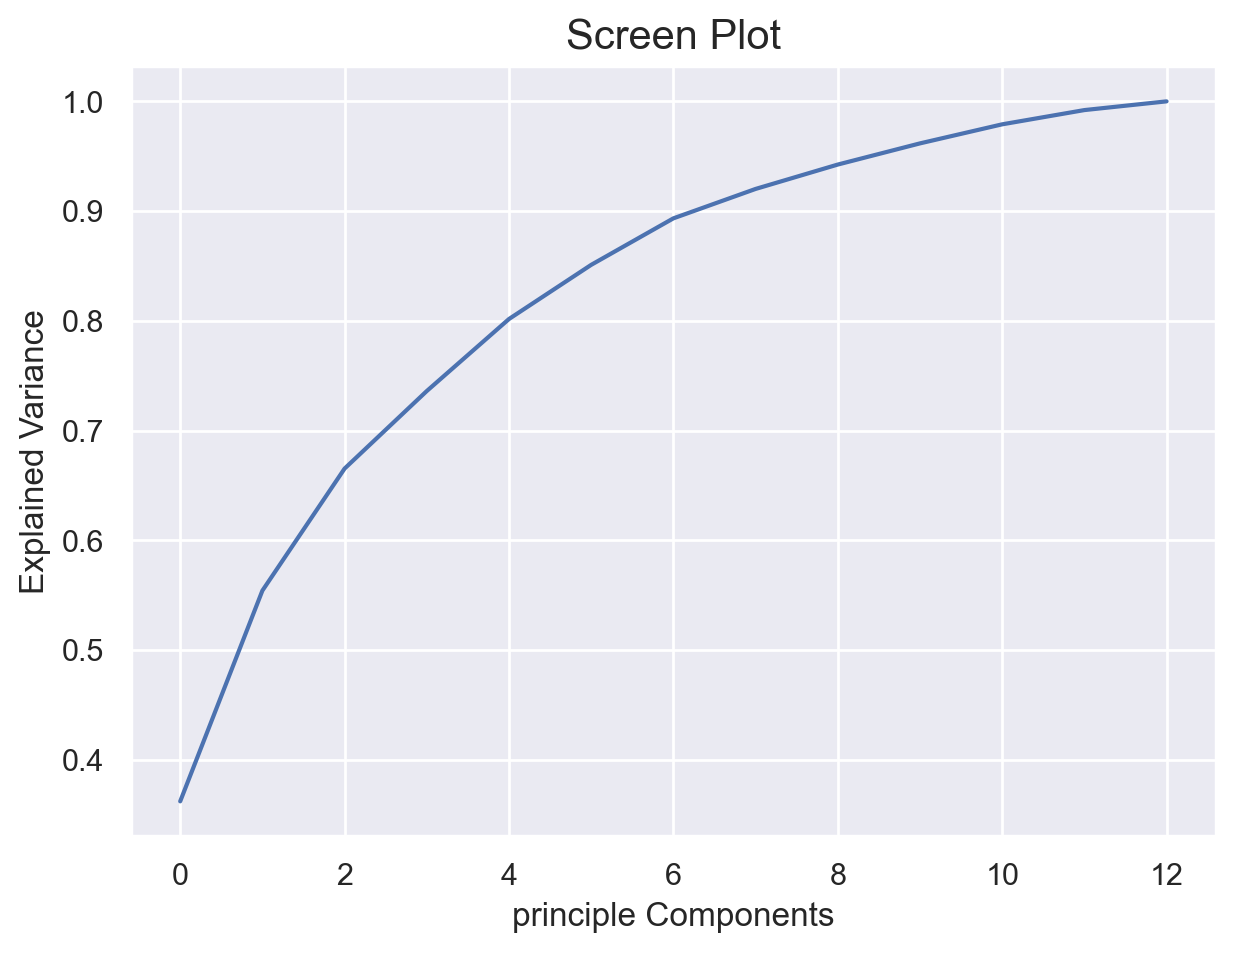

In [105]:
#plt.figure(figsize=(4,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))        #Cumlutaive Sum 
plt.xlabel("principle Components")
plt.ylabel("Explained Variance")
plt.title("Screen Plot",size=15)

In [108]:
pca =PCA(n_components=4)
pcs =pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00,
      

In [110]:
data = pd.DataFrame(pcs,columns=['PC1','PC2','PC3','PC4'])
data

,PC1,PC2,PC3,PC4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527
174,-2.601956,-1.757229,0.207581,0.349496
175,-2.677839,-2.760899,-0.940942,0.312035
176,-2.387017,-2.297347,-0.550696,-0.688285


In [112]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [116]:
data["Type"]=y

In [118]:
data

,PC1,PC2,PC3,PC4,Type
0,3.316751,-1.443463,-0.165739,-0.215631,1
1,2.209465,0.333393,-2.026457,-0.291358,1
2,2.516740,-1.031151,0.982819,0.724902,1
3,3.757066,-2.756372,-0.176192,0.567983,1
4,1.008908,-0.869831,2.026688,-0.409766,1
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,3
174,-2.601956,-1.757229,0.207581,0.349496,3
175,-2.677839,-2.760899,-0.940942,0.312035,3
176,-2.387017,-2.297347,-0.550696,-0.688285,3


In [120]:
data['PC1'].mean()

-1.5967252488991015e-16

In [122]:
data['PC2'].mean()

-7.983626244495507e-17

# Task 3: Clustering with Original Data

In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [127]:
# KMeans clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_original.fit_predict(x)

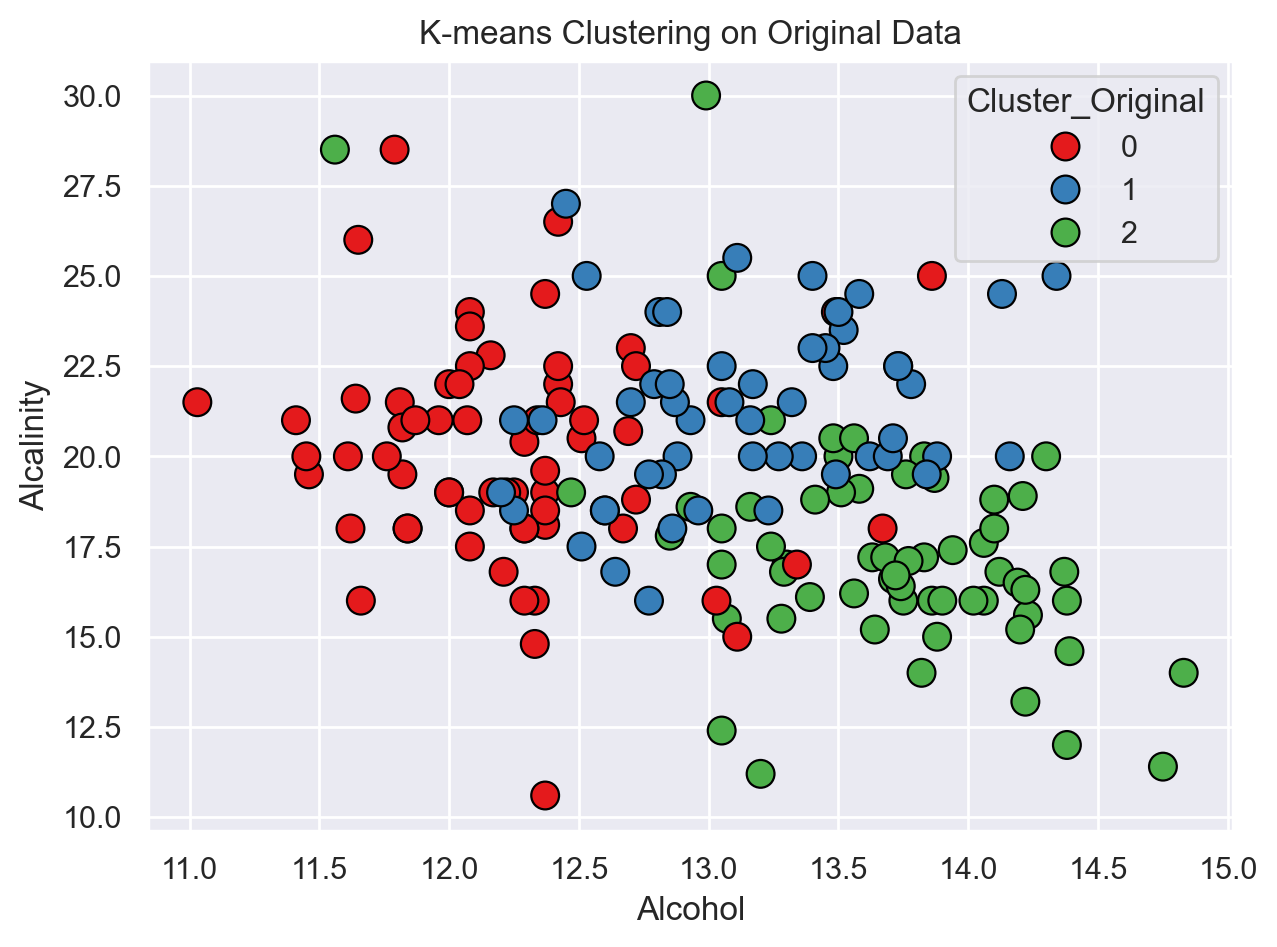

In [129]:
# Visualize clustering results
sns.scatterplot(x=df['Alcohol'], y=df['Alcalinity'], hue=df['Cluster_Original'], palette='Set1', s=100, edgecolor='black')
plt.xlabel("Alcohol")
plt.ylabel("Alcalinity")
plt.title("K-means Clustering on Original Data")
plt.show()

In [131]:
# Evaluate clustering performance
silhouette_original = silhouette_score(x, df['Cluster_Original'])
davies_bouldin_original = davies_bouldin_score(x, df['Cluster_Original'])

print("Silhouette Score (Original Data):", silhouette_original)
print("Davies-Bouldin Index (Original Data):", davies_bouldin_original)

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.389187977718165


# Task 4: Clustering with PCA Data

In [134]:
# KMeans clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
data['Cluster_PCA'] = kmeans_pca.fit_predict(pcs)

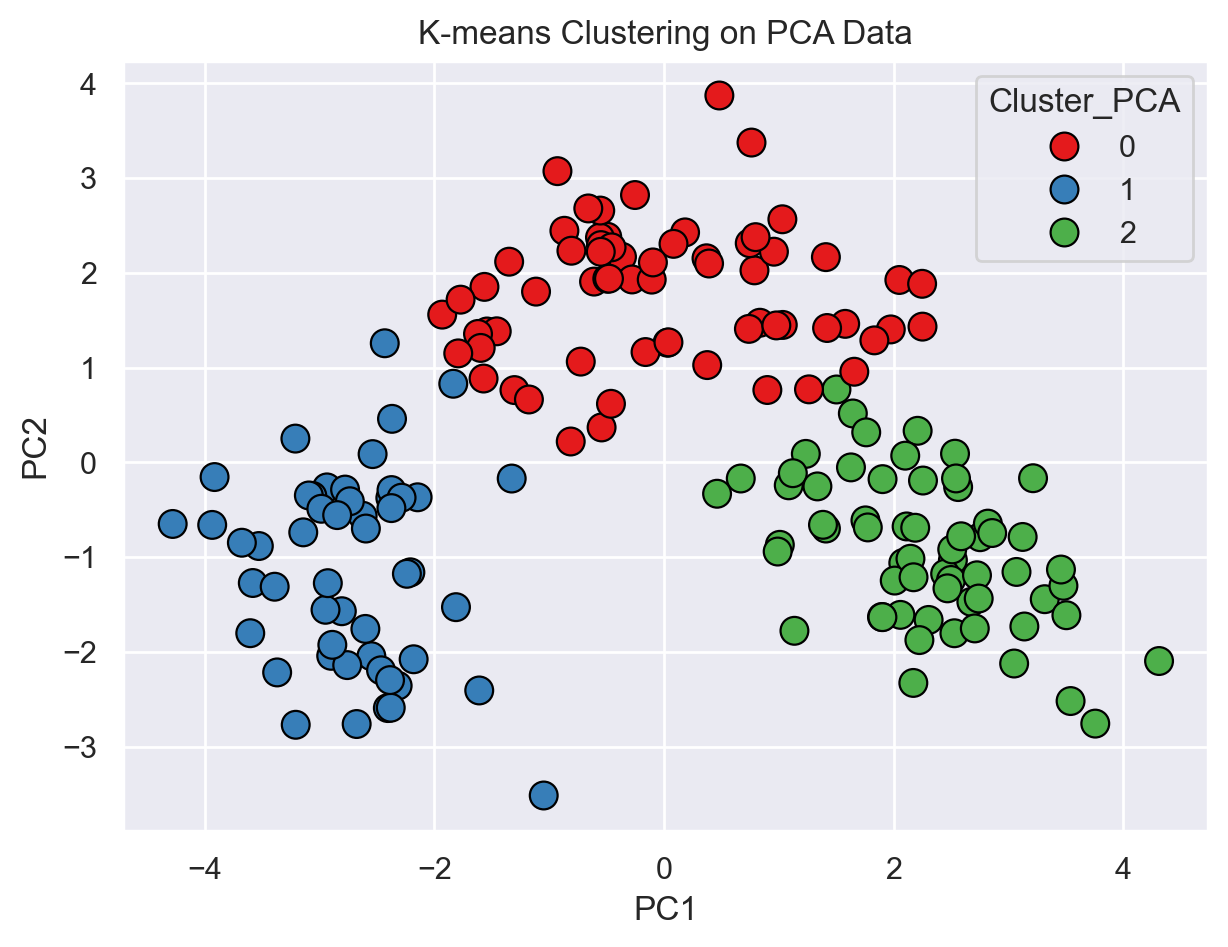

In [136]:
# Visualize clustering results from PCA
sns.scatterplot(x=data['PC1'], y=data['PC2'], hue=data['Cluster_PCA'], palette='Set1', s=100, edgecolor='black')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means Clustering on PCA Data")
plt.show()

In [138]:
# Evaluate clustering performance on PCA data
silhouette_pca = silhouette_score(pcs, data['Cluster_PCA'])
davies_bouldin_pca = davies_bouldin_score(pcs, data['Cluster_PCA'])

print("Silhouette Score (PCA Data):", silhouette_pca)
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_pca)

Silhouette Score (PCA Data): 0.4050568527010297
Davies-Bouldin Index (PCA Data): 0.9884375557459996


# Task 5: Comparison and Analysis

In [141]:
# Print comparison of clustering performance
print("Silhouette Score Comparison:")
print("Original Data:", silhouette_original)
print("PCA Data:", silhouette_pca)

print("\nDavies-Bouldin Index Comparison:")
print("Original Data:", davies_bouldin_original)
print("PCA Data:", davies_bouldin_pca)

Silhouette Score Comparison:
Original Data: 0.2848589191898987
PCA Data: 0.4050568527010297

Davies-Bouldin Index Comparison:
Original Data: 1.389187977718165
PCA Data: 0.9884375557459996


# Task 6: Conclusion and Insights

* Key Findings *
1. Clustering Performance on Original Data:

-  Silhouette Score (Original Data): 0.2848589191898987
- Davies-Bouldin Index (Original Data): 1.389187977718165
- The clustering on the original data provided reasonable performance, but the results may have been influenced by high dimensionality or correlated features.

2. Clustering Performance on PCA-Transformed Data:

- Silhouette Score (PCA Data): 0.4050568527010297
- Davies-Bouldin Index (PCA Data): 0.9884375557459996
- Dimensionality reduction with PCA improved the clustering performance by removing noise and focusing on the most significant features. The clustering was more distinct in the reduced feature space.

3. Differences in Clustering Results:

- PCA-transformed data showed better-defined clusters compared to the original dataset, as evidenced by the improved Silhouette Score and reduced Davies-Bouldin Index.
- Visualization of clusters in 2D space (PC1 vs. PC2) highlighted clearer separations between clusters, which were less obvious in the original feature space.

* Practical Implications
  
1. When to Use PCA Before Clustering:

- When the dataset has high dimensionality, PCA can reduce complexity while retaining significant variance, leading to better clustering results.
- PCA is particularly beneficial when features are highly correlated, as it removes multicollinearity.
- It is useful when computational efficiency is required, as PCA reduces the number of dimensions and thus speeds up clustering algorithms.

2. When to Avoid PCA:

- If interpretability of individual features in the clustering process is crucial, PCA may obscure the relationship between the original features and clusters.
- If the dataset has only a few dimensions with limited correlation, PCA may not provide significant benefits.

* Recommendations

1. Use PCA with Clustering for high-dimensional datasets to improve clustering performance and visual clarity. Focus on the cumulative explained variance to select an optimal number of principal components.

2. Direct Clustering on Original Data can be preferred when:

- Dimensionality is low.
- Feature interpretability is essential for the task.
- Evaluate both approaches (PCA-transformed and original data) in practice to identify the best clustering results based on performance metrics and visualization.

* Summary

1. Using PCA before clustering not only improves performance metrics like Silhouette Score and Davies-Bouldin Index but also provides a clearer visual representation of clusters. However, the trade-off between interpretability and performance must be considered. The choice depends on the specific goals of the analysis and the characteristics of the dataset.
2. By integrating PCA and clustering effectively, data analysts can uncover meaningful patterns in complex datasets while balancing computational efficiency and result interpretability.